<a href="https://colab.research.google.com/github/akikohatsune/onion-domaincustom/blob/main/Custom_onion_domainname.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Runtime > Run all (or Ctrl+F9)**
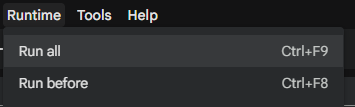

In [ ]:
# @title Step 0: Select CPU Runtime (Recommended)
# @markdown **Important:** For this specific tool (`mkp224o`), using the **CPU** runtime is recommended.
# @markdown GPU sessions on Colab are more likely to be disconnected due to inactivity or resource limits if not fully utilized.
# @markdown
# @markdown **How to switch to CPU:**
# @markdown 1. Click on **Runtime** in the top menu.
# @markdown 2. Select **Change runtime type**.
# @markdown 3. Under **Hardware accelerator**, select **None** (or **CPU**).
# @markdown 4. Click **Save**.

print("Please ensure you have selected CPU runtime for better session stability.")

Please ensure you have selected CPU runtime for better session stability.


In [ ]:
# @title Step 1: Install and compile the tool
# @markdown This process takes about 1-2 minutes to install the libraries and compile tool.

!sudo apt update
!sudo apt install gcc libc6-dev libsodium-dev make autoconf -y
!git clone https://github.com/cathugger/mkp224o.git
%cd mkp224o
!./autogen.sh
!./configure
!make

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [6,205 kB]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,633 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,860 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,572 kB]
Get:14 http:/

In [ ]:
# @title Step 2: Download htop and fastfetch
# @markdown u can skip this step:)
!wget https://github.com/fastfetch-cli/fastfetch/releases/latest/download/fastfetch-linux-amd64.deb
!sudo apt install ./fastfetch-linux-amd64.deb
!wget http://archive.ubuntu.com/ubuntu/pool/main/h/htop/htop_3.0.5-7build2_amd64.deb
!sudo dpkg -i htop_3.0.5-7build2_amd64.deb

--2025-12-25 07:53:21--  https://github.com/fastfetch-cli/fastfetch/releases/latest/download/fastfetch-linux-amd64.deb
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fastfetch-cli/fastfetch/releases/download/2.56.1/fastfetch-linux-amd64.deb [following]
--2025-12-25 07:53:21--  https://github.com/fastfetch-cli/fastfetch/releases/download/2.56.1/fastfetch-linux-amd64.deb
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/340181518/12f6e010-54bc-4419-af35-67ad4dba8a01?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-25T08%3A48%3A38Z&rscd=attachment%3B+filename%3Dfastfetch-linux-amd64.deb&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-

In [ ]:
# @title Step 3: Run tool
# @markdown - Search prefix set to `name` (5 chars) for quick generation (approx. a few minutes).
# @markdown - If you want to try your luck with 6 chars, edit the command below (might take several hours).
# @markdown - **WARNING: Do not attempt more than 6 characters!** (It will take years or several millenniums).
# @markdown - **You can stop when you've had enough to eat**.


# Added -s parameter to print speed statistics
!./mkp224o miku -d keys -s


set workdir: keys/
sorting filters... done.
filters:
	hatsu
in total, 1 filter
using 2 threads
>calc/sec:3483096.516468, succ/sec:0.000000, rest/sec:19.775939, elapsed:0.101133sec
hatsuog6l5yjxel2m3uydrp4wdzigtskque4kfjmx6rgmurna2e7wpyd.onion
hatsuec3tdvpkyucludefrrli6iq3my3tjmkcqxwuzkgshj3i4ua4yad.onion
hatsum3bnxy6cn2c3dutqfc7asnhe5q6dwrzfjkqfmqmmaqkwdjpiyid.onion
>calc/sec:3057696.145661, succ/sec:0.299362, rest/sec:0.299362, elapsed:10.122461sec
hatsuweezy5p54axmlmw7kcin2rbu5gssiuflwuw32kkvp2ekxgmyqid.onion
>calc/sec:3361920.356864, succ/sec:0.099803, rest/sec:0.099803, elapsed:20.142182sec
hatsu42mhktbeqsxem5agfcjqliomt52r6iqrpcree3v46kjnikxmhid.onion
waiting for threads to finish... done.


In [ ]:
# @title Step 4: Download & Setup Instructions
# @markdown After running this cell, `my_onion_keys.zip` will download automatically.
# @markdown ---
# @markdown **Setup Instructions for VPS/Server:**
# @markdown 1. Extract the downloaded zip file. You will see folders named like `<your_prefix>....onion`.
# @markdown 2. Open the folder with your preferred domain. Copy all 3 files inside (`hostname`, `hs_ed25519_secret_key`, `hs_ed25519_public_key`).
# @markdown 3. Paste them into your Tor Hidden Service directory on your VPS (usually `/var/lib/tor/hidden_service/`).
# @markdown 4. Set directory ownership (Linux command):
# @markdown `chown -R debian-tor:debian-tor /var/lib/tor/hidden_service/`
# @markdown 5. Restart Tor:
# @markdown `sudo systemctl restart tor`

import shutil
import os
from google.colab import files

# Check if 'keys' folder exists to avoid errors
if os.path.exists('keys'):
    print("Zipping files...")
    shutil.make_archive('my_onion_keys', 'zip', 'keys')
    print("Downloading...")
    files.download('my_onion_keys.zip')
else:
    print("❌ Error: 'keys' folder not found. Please make sure you ran Step 3 and found a domain first.")
    # thanks  Gemini

Zipping files...
Downloading...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>